In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\NewUser\Downloads\College.csv')

In [3]:
df.shape

(1000, 3)

In [9]:
df.sample(5)

,cgpa,placement_exam_marks,placed
360,7.24,33,0
334,6.56,19,1
845,5.98,36,0
805,6.23,13,0
942,7.03,6,0


In [10]:
df.head(-5)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


C:\Users\NewUser\AppData\Local\Temp\ipykernel_8512\1676621559.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


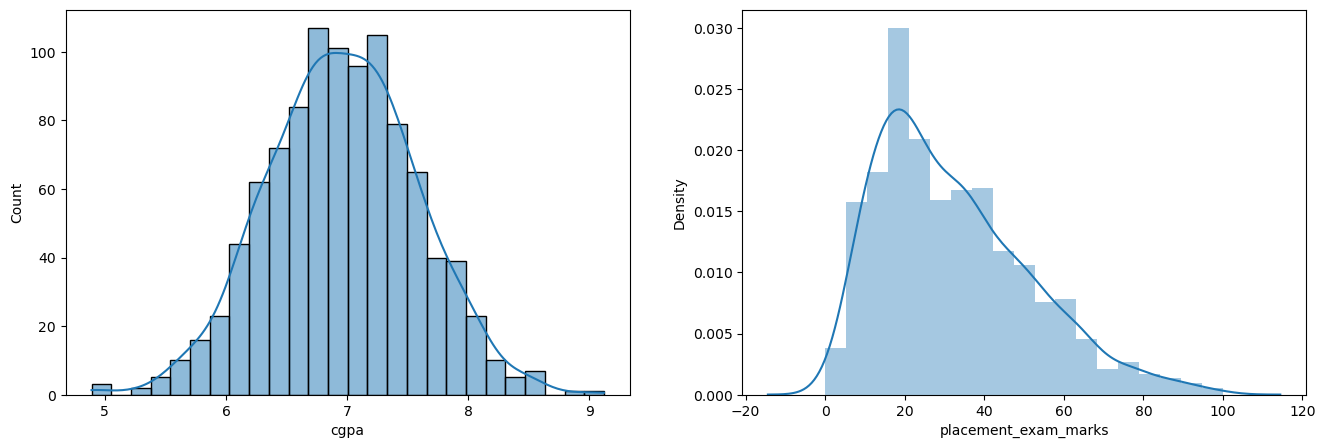

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [17]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [21]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [18]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [ ]:
#boundary values - Formula for outliers:
#Upper boundary = mean + 3*std
#Lower boundary = mean - 3*std
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


<Axes: >

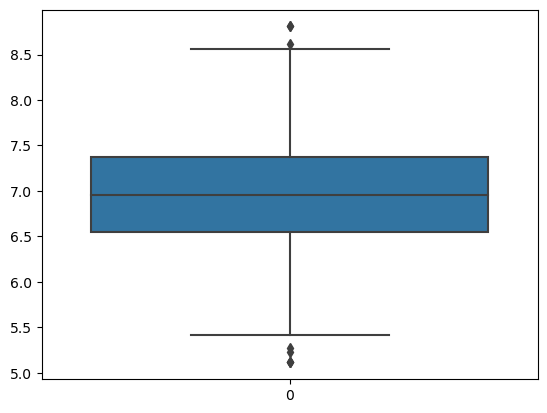

In [38]:
sns.boxplot(df['cgpa'])

In [25]:
#outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


## Trimming

In [26]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


In [27]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371


In [29]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [30]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [31]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [32]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [33]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


## Capping

In [34]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [35]:
lower_limit

5.113546374602832

# np.where(x,y,z) is a vectorized if-else statement. 
- It checks the condition x, and if it is true, it returns y; otherwise, it returns z.
- In this case, it is used to cap the values of 'cgpa' at the upper and lower limits. 

In [36]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [73]:
df.shape

(1000, 4)

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64